<a href="https://colab.research.google.com/github/Ritu-01/NEW-EXAMPLE/blob/main/Copy_of_Module_2b_Decision_Tree_Classifier_Overfitting_Cleveland_dataset_CSC508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Welcome to the module 2b coding part: Decision Tree Classifier and Overfitting!**

*This notebook was originally created at San Francisco State University (SFSU) by Vaisakh Kusabhadran, Amisha Dhawan, Yuomi Zavaleta (all SFSU students) and Pleuni Pennings (SFSU bio professor).*

*This notebook was edited for the Promoting INclusivity and Computing (PINC) and gSTAR programs by Dr. Pleuni Pennings, Lucy Moctezuma Tan and Lorena Benitez-Rivera (master students) all members of the COde to understand Drug resistance Evolution (CODE) lab at SFSU in 2023.*

#OBJECTIVE OF THIS NOTEBOOK:

Now that we have learned how to make predictions using **Decision Trees**, we can take a look at what happens when we **overfit** or **underfit **our data.

In this module we are going to continue using the 14 variables from the Cleveland dataset.

Below we have a brief description of what each of the features we are going to use mean. The numbers next to the features are the ones that were used in the original dataset.

<ul type = "square">
<li> [1] #3 Age: age in years</li>
<li> [2] #4 Sex: sex (1 = male; 0 = female)</li>
<li> [3] #9 Chest_pain_type
<ul>
<li>Value 1: typical angina
<li>Value 2: atypical angina
<li>Value 3: non-anginal pain
<li>Value 4: asymptomatic</li>
</ul>
<li> [4] #10 At_rest_bp: resting blood pressure (in mm Hg on admission to the hospital)</li>
<li> [5] #12 Cholesterol: serum cholestoral in mg/dl </li>
<li> [6] #16 Fast_blood_sug: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li> [7] #19 Rest_ecg: resting electrocardiographic results
<ul>
<li>Value 0: normal
<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>
<li> [8] #32 Maxhr: thalach: maximum heart rate achieved</li>
<li> [9] #38 Exer_angina: exang: exercise induced angina (1 = yes; 0 = no)</li>
<li> [10] #40 Oldpeak: ST depression induced by exercise relative to rest </li>
<li> [11] #41 Slope: the slope of the peak exercise ST segment
<ul>
<li> Value 1: upsloping</li>
<li> Value 2: flat</li>
<li> Value 3: downsloping</li>
</ul>
<li> [12] #44 Ca: number of major vessels (0-3) colored by flourosopy</li>
<li> [13] #51 Thal: Thallium or stress test 3 = normal; 6 = fixed defect; 7 = reversable defect. See this
<a href="https://www.healthline.com/health/thallium-stress-test">website</a>
for more info on the thallium or stress test.
</li>
<li> [14] #58 Diag: num: diagnosis of heart disease (angiographic disease status)
<ul>
<li>Value 0: no vessel with 50% diameter narrowing</li>
<li>Value 1: one vessel with 50% diameter narrowing</li>
<li>Value 2,3,4: 2,3,4 vessels with 50% diameter narrowing</li>
</ul>
</li>
</ul>

The **goal** of this notebook is to learn how overfitting works using the decision tree classifier model. I like decision trees because they are easier to understand than most other machine learning or statistical learning methods.

Your mission is to run each cell, see what happens, and answer some questions based on the code.

# Let's look at the Cleveland dataset again with a focus on **overfitting**.

#WHAT IS OVERFITTING?

In machine learning it's important to train the models properly, not too much, not too little. For that reason, it's important to learn how to handle data that could be either overfitting or underfitting.

![Underfitting_e_overfitting.png](
https://upload.wikimedia.org/wikipedia/commons/d/d2/Underfitting_e_overfitting.png)

**OVERFITTING**: is a undesirable machine learning behavior, where our model follows too closely our training data, meaning it learns to predict our training data very well but it fails to make accurate predictions for new data.

**UNDERFITTING**: is a undesirable machine learning behavior, where our model
does not get to learn enough from our training data, and therefore performs poorly when trying to make predictions for new data.

What we actually want is somewhere in the middle, we want it to fit just right like a nice shoe! We dont want our shoes to be so loose that we could loose them while walking (underfit) or so perfectly close to the shape of our foot that it feels too tight to walk comfortably (overfit).

You can find more information about overfitting and underfitting here: [Scikit-learn: Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

## **Step 1) Importing packages**

Here we importing all the necessary packages– we'll explain what they do later when we use them.

In [ ]:
# packages for data manipulation
import pandas as pd
import numpy as np

# packages for creating the machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

#hyperparameter tunning imports
from sklearn.model_selection import validation_curve

##**Step 2) Importing Cleveland dataset**
First, we fetch the dataset from the 508 class github repository and state what columns we are interested in. The data are stored in a pandas data frame called "data".

In [ ]:
# Loading our dataset again from github
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]
data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.cleveland.data.txt',header=None,names=columns )
data.head()

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##**Step 3) Dealing with missing data**
Next, we are going to do some work to deal with the missing data. Note that every dataset encodes **Missing values** differently, which is why it is a good idea sometimes to check exactly how missing values were encoded either from your data source, looking at the documentation about the data, etc.

In this case our dataset missing values, were encoded with a **"question mark (?)"**. Identify the columns having missing values


### **Task 1:** Checking for missing data (Questions 1-3)

### **Question 1:**

Is there missing data in the dataset, if so, how can you check that?

Which are the variables that have missing data?

In [ ]:
#Code line to answer question 1
(data=='?').sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 4
Thal               2
Diag               0
dtype: int64

**Question 1 answer:**
Yes, there is missing data in the dataset. We can check that using the above code.
The above code adds the amount of '?' from each feature. Looking at the sum of each featues we found Ca = 4 and Thal = 2 which means Ca has 4 missing data and Thal has 2 missing data.
This shows that Ca and Thal are the missing data in the dataset.

### **Question 2:**

How can you display the missing values location?

In [ ]:
#Code line to answer question 2
missing_values = data.loc[(data['Thal'] == "?") | (data['Ca'] == "?")]
missing_values


,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


**Question 2 answer:**
We can display missing values using the above code which replaces the missing data with '?'.

Dealing with missing data, by replacing all missing values with the medians of the feature column.


In [ ]:
# Replacing all the missing data with the median
data = data.replace('?', np.nan)
data['Thal'] = data['Thal'].fillna(data['Thal'].median())
data['Ca'] = data['Ca'].fillna(data['Ca'].median())

### **Question 3:**

How can you verify that there is not missing values?

In [ ]:
#Code line to answer question 3
(data==np.nan).sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 0
Thal               0
Diag               0
dtype: int64

**Question 3 answer:**
The above code shows that all the features being 0 which means there is not any missing values.

###**Task 2:** Understanding how machine learning models work (Questions 4-8)

### **Question 4:**

Write a list of the five basic steps there are before start training a machine learning model:




**Question 4 answer:**

1.   Importing the dataset
2.   Splitting dataset to training and testing dataset
3.   Model Selection
4.   Cross-Validation
5.   Documentation








## **Step 4)** **Splitting target and features**
Next we will separate our target variable from our features (variables used for predictions).

**NOTE:** We want to take the "Diag" column out of the features dataframe, because it is actually not a feature (in our analysis) but it is the "target"
**Target** – what we want to predict.

In [ ]:
# specifying target variable or label
labels = np.array(data["Diag"])

#Specifying feature variables
features = data.drop(columns='Diag')
features = features.astype('float64')
feats = np.array(features)

# For brevity we will rename them as X(features) and y(label)
X = features
y = labels

Next, we are converting the labels (stored in variable y) to binary values so that the model is trained just to predict the presence/absence of heart disease. All the values that are 1 or higher will just be 1 from here on. Recall that:

- **[0]** means no vessel with 50% diameter narrowing (No Heart Disease)
- **[1]** means one or more vessels with 50% diameter narrowing (Heart Disease)

In [ ]:
# converting our target variable into 1 and 0
y = np.where(y >= 1,1,0)

### **Question 5:**

Why did we need to change the label to [0] no heart disease and [1] heart disease for this Decision Tree Classifier model dataset?




**Question 5 answer:**
 We need to change the labels 0 for no heart disease and 1 for heart disease because the model is trained just to predict the presence/absence of heart disease.

## **Step 5) Separating train and test data**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) # 70% training and 30% test

Up until now we have only reviewed what we have already done in the first part of the Notebook [Module 2a](https://colab.research.google.com/drive/1_c9LmAqNGwG2EBFSGCVpv5CzG6lOz29U?usp=share_link)

Now we are going observe differences in fitting our tree when we change the **max_deph** argument.

### **Question 6:**

Why do we use more percentage for training?



**Question 6 answer:**
We use more percentage for training because it helps the model to learn different patterns of the dataset and also helps prevent the model from memorizing.

### **Question 7:**

Why do we use less percentage for testing?




**Question 7 answer:**
We use less percentage for testing because testing is used to evaluate the model's performance and large data is not required for doing it.

### **Question 8:**

When we split the data into training and testing, does that mean that we start training from there, why or why not?




**Question 8 answer:**
No,when we split the data into training and testing, it doesn't mean that we start training from there because it should go through the process of choosing a relevant model according to the task which helps in determining the output we get after running a machine learning algorithm

## **Step 6) Making the decision tree and making predictions with it**


###**Task 3:** Testing underfitted and overfitted decision trees (Questions 9-12)




#Underfitted Decision Tree

Here we will create a Decision Tree that is only 2 layers deep. Just as before we will create it, train it and graph it. Later we will compare how our tree performs by making predictions for the training data as well as for the testing data.  


In [ ]:
# Create Decision Tree classifer object
clf_under = DecisionTreeClassifier(max_depth=2, random_state=2)

# Train Decision Tree Classifer
clf_under = clf_under.fit(X_train,y_train)

Let's visualize our tree. Notice that because we specified that our tree should be at max 2 layers, the end gini values do not always reach to 0, unlike the first tree we made in the previous module, plus as expected we can see that there are only 2 layers 1 root node layer + 1 subsequent layer, before reaching the leaf nodes (prediction nodes). One layer, consists in all the nodes that are at the same height or level. For example: 2nd layer is composed of 2 nodes: ($Ca \le 0.5$) and ($Chest \ pain \ type \le 3.5$)

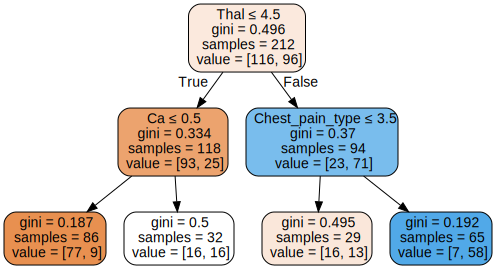

In [ ]:
# Code to visualize our Decision Tree
dot_data_under = tree.export_graphviz(clf_under, out_file=None,
                                  feature_names=features.columns,
                                  filled=True, rounded=True,
                                  special_characters=True)
graph = graphviz.Source(dot_data_under)
graph.render("Classification tree")
display(graph)

 **a) Calculating Accuracy of Tree for training data**

In [ ]:
#Predict the response for training dataset
y_pred_train = clf_under.predict(X_train)

# Calculating Accuracy of our Tree
acc_under_train = round(100 * metrics.accuracy_score(y_train, y_pred_train),2)
print("Training Accuracy:",acc_under_train,"%")

Training Accuracy: 78.77 %


### **Question 9:**

What is the training accuracy %?




**Question 9 answer:**
The training accuracy is 78.77%

 **b) Calculating Accuracy of Tree for testing data**

In [ ]:
#Predict the response for test dataset
y_pred = clf_under.predict(X_test)

# Calculating Accuracy of our Tree
acc_under_test = round(100 * metrics.accuracy_score(y_test, y_pred),2)
print("Test Accuracy:",acc_under_test,"%")

Test Accuracy: 73.63 %


### **Question 10:**

What is the testing accuracy %?




**Question 10 answer:**
The testing accuracy is 73.63%

As we can see, our model is not great at predicting the training data nor the testing data. This is a case of **underfitting**.

#Overfitted Decision Tree

Here we will create a Decision Tree that is only 10 layers deep. Just as before we will train it, and then use our test data to make predictions to check our accuracy of our model.

In [ ]:
# Create Decision Tree classifer object
clf_over = DecisionTreeClassifier(max_depth=10, random_state=2)

# Train Decision Tree Classifer
clf_over = clf_over.fit(X_train,y_train)


Below we will graph our tree as before. This time note that the gini values for our tree do reach to 0, unlike the underfitted Decision tree. When we do not specify the depth of our created tree, the default is to run our tree until it reaches a gini value of 0. But we will see that this doesn't always mean that we have the most optimal model. What we actually care about is having a high accuracy when predicting TESTING Data.

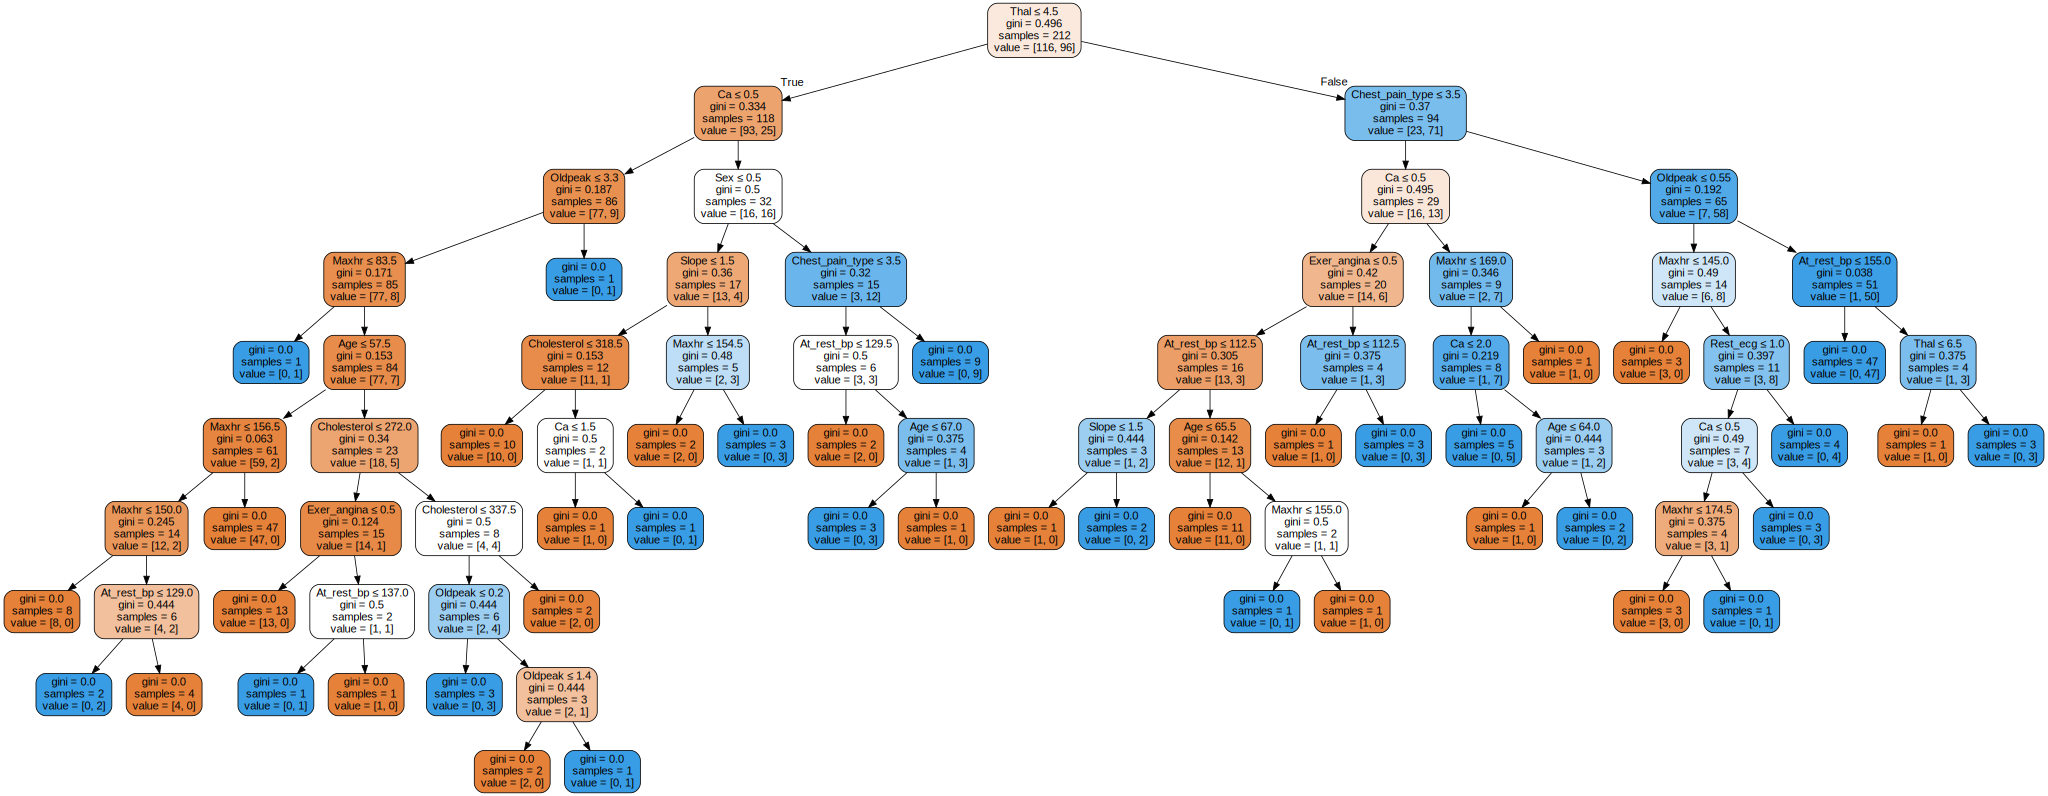

In [ ]:
# Code to visualize our Decision Tree
dot_data_over = tree.export_graphviz(clf_over, out_file=None,
                                  feature_names=features.columns,
                                  filled=True, rounded=True,
                                  special_characters=True)
graph2 = graphviz.Source(dot_data_over)
graph2.render("Classification tree")
display(graph2)

 **a) Calculating Accuracy of Tree for training data**

In [ ]:
#Predict the response for training dataset
y_pred_train2 = clf_over.predict(X_train)

# Calculating Accuracy of our Tree
acc_over_train = round(100 * metrics.accuracy_score(y_train, y_pred_train2),2)
print("Training Accuracy:",acc_over_train,"%")

Training Accuracy: 100.0 %


### **Question 11:**

What is the training accuracy %?




**Question 11 answer:**
The training accuracy is 100%

 **b) Calculating Accuracy of Tree for testing data**

In [ ]:
#Predict the response for test dataset
y_pred2 = clf_over.predict(X_test)

# Calculating Accuracy of our Tree
acc_over_test = round(100 * metrics.accuracy_score(y_test, y_pred2),2)
print("Test Accuracy:",acc_over_test,"%")

Test Accuracy: 70.33 %


### **Question 12:**

What is the training accuracy %?




**Question 12 answer:**
It is 70.33%.

As we can see, our model is amazing at predicting the training data, however the accuracy for the testing data is not great. This is a case of **overfitting**.

###**Task 4:** Final thoughts (Questions 13-15)

# Finding the Best Fitting Tree

There are different methods to find the best fitting Decision Tree, the task of finding the best fitting Machine Learning Model in general is called **Hyper parameter tunning**. Each kind of machine learning model has different kinds of hyperparameters to tune. We will comeback to this concept in later modules. But for our example, we are trying to tune the **max_depth** of our Decision Tree Classifier. So how do we know what number to pick for max_depth?

### Validation Curve
One possibility would be to use a **validation curve**. In this method we essentially fit our tree using a range of depths. We saw in the previous part that choosing 2 produced underfitting and choosing 10 was overfitting, thus the optimal depth must be in between. So why don't we test a range from 1 to 10?


In [ ]:
# Setting figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Choosing a range from 1 to 10 to test
tree_depths = range(1,11)

Once we have the range we want to test we can start plotting our validation curve. This plot is created by using our complete data and splits it randomly a certain amount of times (the default is 5), into 2 portions: **Training** data and **Validation** data chunks. The Validation data is essentially similar to testing data. Doing the different splits lets us essentially create simulated "testing data chunks" from data that we already have, so it's inherently biased but in this way we can have at least an idea of how the depth of a tree influences the accuracy of our predictions.

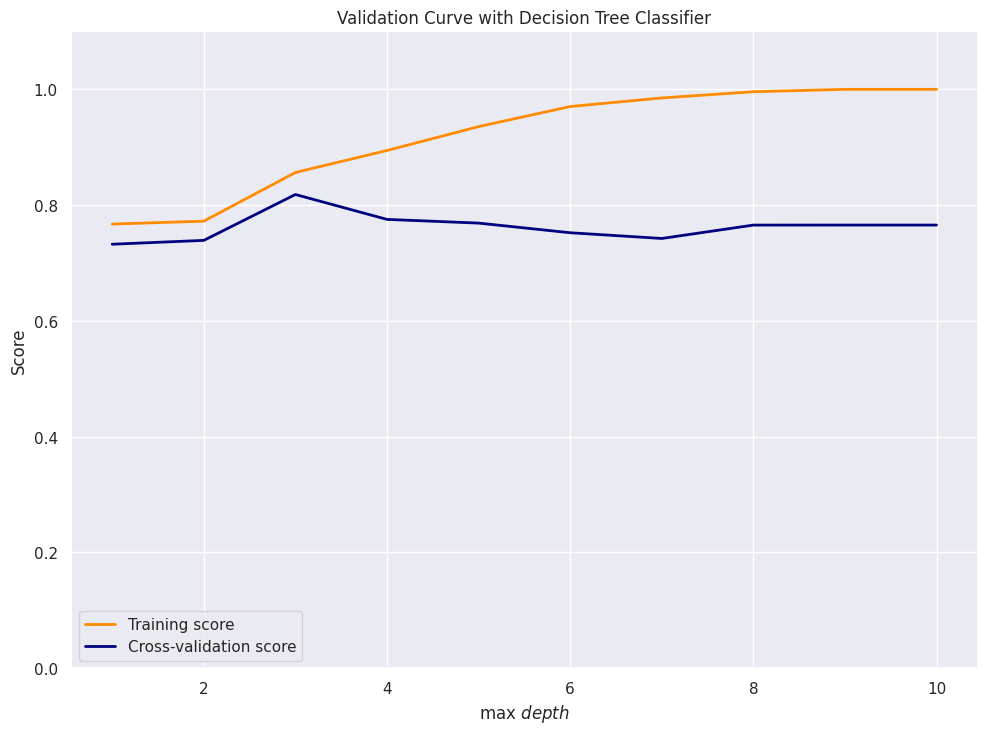

In [ ]:
# create validation curve
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=2),
    X,
    y,
    param_name="max_depth",
    param_range=tree_depths,
    scoring="accuracy")

# storing scores mean scores(from default 5 random splits)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(test_scores, axis=1)

# plot titles and labels
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel(r"$\max \ depth$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(tree_depths, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.plot(tree_depths, validation_scores_mean, label="Cross-validation score", color="navy", lw=2)

# plot legend
plt.legend(loc="lower left")
plt.show()

### **Question 13:**

Can you tell with max depth is underfitting and overfitting just by looking at this graph, explain how?




**Question 13 answer:**
The max depth of 2 is underfitting and max depth of 10 is overfitting because in max depth 2 training score and cross-validation score were in around 70ish percent and in max depth 10, lines diverge expecting training score to be 100% .

- Based on the graph above we can see that indeed choosing a max depth of 2 was underfitting , because both the **training score and the crossvalidation score** were in the around the **70'ish percent**.

- Choosing 10 was overtfitting because we see the **lines diverge** dramatically, the training is as expected perfect 100% but the testing was not going in the same direction.

- the optimal spot accordding to our validation curve would be around 3, because we can see that both **lines are not diverging** and they are the **highest accuracy score before diversion**.

Therefore lets try using max_depth = 3 and see what results we get in our Decision Tree Classifier. Remember that what our ideal is to have high training and testing accuracy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Create Decision Tree classifer object
clf_best = DecisionTreeClassifier(max_depth=3, random_state=2)

# Train Decision Tree Classifer
clf_best = clf_best.fit(X_train,y_train)

 **a) Calculating Accuracy of Tree for training data**

In [ ]:
#Predict the response for training dataset
y_pred_train3 = clf_best.predict(X_train)

# Calculating Accuracy of our Tree
acc_best_train = round(100 * metrics.accuracy_score(y_train, y_pred_train3),2)
print("Training Accuracy:",acc_best_train,"%")

Training Accuracy: 85.85 %


 **b) Calculating Accuracy of Tree for testing data**

In [ ]:
#Predict the response for test dataset
y_pred_best = clf_best.predict(X_test)

# Calculating Accuracy of our Tree
acc_best_test = round(100 * metrics.accuracy_score(y_test, y_pred_best),2)
print("Test Accuracy:",acc_best_test,"%")

Test Accuracy: 80.22 %


As we can see we have bumped our testing accuracy from low 70's% in both cases of (underfitting and overfitting) to 80.22% with the help of our cross validation curve!

###**Question 14:**

Did you find this module understandable or do you believe it requires more details and explanation?

**Question 14 answer:**
Yes, I found this module understandable and asy to walk through the concept of the overfitting and underfitting

###**Question 15:**

Write down one thing you learned today and one thing that confuses you. (I know, I ask this all the time, but it is important to think about it for a few seconds!)

**Question 15 answer:**

Learned
1. The one thing that I learned today is to read the validation curve with decision tree classifier, if the training score and cross-validation graph are near to eachother that means underfitting and if they diverges from eachother then that means overfitting.
Confused   
2. The thing I'm confused is how do I get the cross-validation score.  



# 🙂 Congratulations! You just finished working on the first machine learning model Decision Trees. You should be proud of how much you have learned (even if you feel like some of this is still confusing, it's going to get easier with practice)